# 失误点：
1、引用赋值造成问题：sample_unvisited的改变，会造成Old_sample_unvisited同样改变

In [10]:
#当使用 Old_sample_unvisited=sample_unvisited 时，两个变量指向相同的对象，修改其中一个变量会影响到另一个。这是一个简单的赋值，没有创建副本。
sample_unvisited = [1, 2, 3, 4, 5]
Old_sample_unvisited = sample_unvisited

# 修改其中一个变量
sample_unvisited[2] = 10

print(Old_sample_unvisited)  # 输出: [1, 2, 10, 4, 5]

#而在使用 Old_sample_unvisited=copy.deepcopy(sample_unvisited) 时，Old_sample_unvisited 将是原对象的完全独立副本，修改其内容不会影响到原对象。

import copy

sample_unvisited = [1, 2, 3, 4, 5]
Old_sample_unvisited = copy.deepcopy(sample_unvisited)

# 修改其中一个变量
sample_unvisited[2] = 10

print(Old_sample_unvisited)  # 输出: [1, 2, 3, 4, 5]

#

[1, 2, 10, 4, 5]
[1, 2, 3, 4, 5]


In [11]:
#导包
from sklearn import datasets #导入数据集
import numpy as np
import random
import matplotlib.pyplot as plt
import time 
import copy


In [12]:

#寻找邻域内样本，j是核心点，x是数据集，eps是邻域参数
def find_neighbor(dataset,j,eps):
    N=[] #统计邻域样本
        #计算欧式距离
    dis=np.sum((dataset-dataset[j])**2,axis=1)**0.5
    N=np.argwhere(dis<=eps).flatten().tolist()
    return set(N)
#定义DBSCAN
#Dataset:数据集，eps：邻域参数，minPts：最小样本数阈值
def DBSCAN(Dataset,eps,minPts):
    neighbors=[] #保存每个样本的邻域
    cluster=[-1 for _ in range(len(Dataset))] #聚类
    #找出所有的核心对象
    Omega_list=[] #核心对象集合
    for i in range(len(Dataset)):
        neighbors.append(find_neighbor(Dataset,i,eps))
        if len(neighbors[-1])>=minPts: #大于邻域参数，加入核心对象集合
            Omega_list.append(i)
    Omega_list=set(Omega_list)
    #以任一核心对象为出发点，找其密度可达的样本生成簇
    k=0
    sample_unvisited=set([i for i in range(len(Dataset))])
   
    while len(Omega_list)>0:
        Old_sample_unvisited=copy.deepcopy(sample_unvisited)
        j=random.choice(list(Omega_list))
        Q=list()
        Q.append(j)
#         print(f"Q:{Q}")
        sample_unvisited.remove(j)

        while len(Q)>0:
            q=Q[0]
            Q.remove(q)
            if len(neighbors[q])>=minPts:
                delta=neighbors[q]&sample_unvisited
                deltalist=list(delta)
                for i in deltalist:
                    Q.append(i)
                    sample_unvisited=sample_unvisited-delta
        k+=1
        Ck=Old_sample_unvisited-sample_unvisited
        Cklist=list(Ck)
        for i in range(len(Ck)):
            cluster[Cklist[i]]=k
        Omega_list=Omega_list-Ck
    return cluster

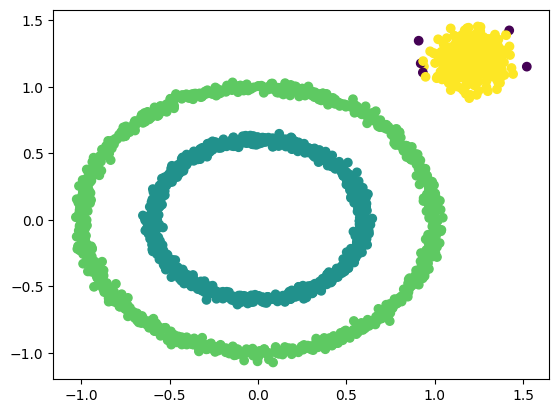

In [22]:
#测试DBSCAN
X1, y1 = datasets.make_circles(n_samples=2000, factor=.6, noise=.02)
X2, y2 = datasets.make_blobs(n_samples=400, n_features=2, centers=[[1.2, 1.2]], cluster_std=[[.1]], random_state=9)

X=np.concatenate((X1,X2))
eps=0.08
minPts=10
C=DBSCAN(X,eps,minPts)
plt.figure()
plt.scatter(X[:,0],X[:,1],c=C)
plt.show()